Can I animate a spinning pceb?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import animation
import mplcyberpunk
import matplotlib.patches as mpatches
import matplotlib.cm as cm
from matplotlib import transforms
from matplotlib.collections import PatchCollection
# from matplotlib.patches import Wedge

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [3]:
#eg uma from bleach+00, need to update with Odette's fit
m1 = 0.64*u.Msun
m2 = 0.42*u.Msun
p= 0.66765930*u.d
r1 = 0.013*u.Rsun
r2 = 0.45*u.Rsun

In [4]:
def p_to_a(m1, m2, p):
    m1, m2, p = m1.to(u.kg), m2.to(u.kg), p.to(u.s)
    a = ((const.G*(m1+m2) * p**2)/(4*np.pi**2))**(1/3)
    return a

a = p_to_a(m1, m2, p)
a = a.to(u.Rsun)
print(a) #yay right answer

def com(m1, m2, a): #find the distances to a COM
    r1 = a / (1 + (m1/m2))
    r2 = a - r1
    return r1, r2

a1, a2 = com(m1, m2, a)
print(a1, a2)

a1, a2 = a1.value, a2.value

3.2777539367471644 solRad
1.298732691918688 solRad 1.9790212448284765 solRad


https://stackoverflow.com/questions/51286455/how-can-i-animate-a-point-moving-around-the-circumference-of-a-circle

Didn't work, this looks more promising https://nickcharlton.net/posts/drawing-animating-shapes-matplotlib.html

In [5]:
#stars https://github.com/jamescalam/python_synthwave
def make_stars(min_x, max_x, min_y, max_y, stars=100):
    y = np.random.uniform(min_y, max_y, stars)
    x = np.random.uniform(min_x, max_x, stars)
    alpha_multiplier = np.random.uniform(.5, 1, len(x))
    size = np.random.uniform(1, 6, len(x))

    return np.array([x, y, alpha_multiplier, size]).T

With wedges

64.0952928


MovieWriter imagemagick unavailable; using Pillow instead.


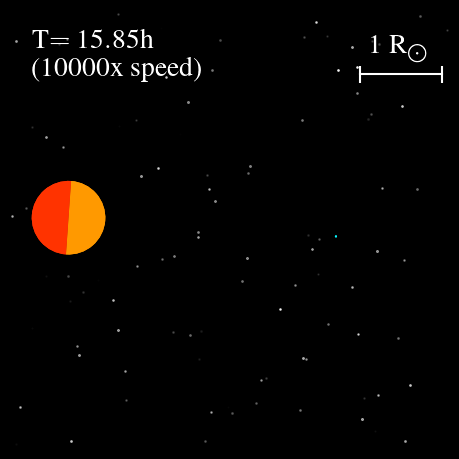

In [6]:
fig = plt.figure(figsize=(5, 5))
fig.set_dpi(100)
fig.set_tight_layout(True)

speedx = 10000
nframes = 90


#fig.set_size_inches(7, 6.5)
plot_rad = 2.69
ax = plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
#patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')
patch2 = mpatches.Wedge((0, -a2), r2.value, 0, 180, fc='#ff9900')
patch3 = mpatches.Wedge((0, -a2), r2.value, 180, 0, fc='#ff3300')


patch1a = plt.Circle((0, a1), r1.value*1.1, fc='#08F7FE', alpha=0.0)
patch2a = plt.Circle((0, a2), r2.value*1.1, fc='#ff3300',alpha=0.0, zorder=-10)

labely = plot_rad-0.8
labelx= plot_rad-0.1
plt.errorbar((labelx, labelx-1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (plot_rad-0.6, 0.9), xycoords=('data', 'axes fraction'), ha='center', c='w')

an = ax.annotate('', (0.05, 0.85), xycoords= 'axes fraction', ha='left', c='w')
# plt.annotate('({}x speed)'.format(speedx), (0.05, 0.83), xycoords= 'axes fraction', ha='left', c='w')

def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch3.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a, patch3

def animate(phi):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch3.center = (x, y)
    phid = (phi*(180/np.pi))+180
#     print(phid)
    theta1 = phid+90
    theta2 = phid+270
    if phid > 90 or phid >= 270:
        patch2.theta1 = theta1
        patch2.theta2 = theta2
        patch3.theta1 = theta2
        patch3.theta2 = theta1
    else:
        patch2.theta1 = theta2
        patch2.theta2 = theta1
        patch3.theta1 = theta1
        patch3.theta2 = theta2
    patch2a.center = (x, y)
    patch2._recompute_path()
    patch3._recompute_path()
    tstep = 0
    if phi > 0:
        tstep = (p.to(u.h).value)*phi/(2*np.pi)
    an.set_text(r'T$={:.2f}$h'.format(tstep)+'\n'+'({}x speed)'.format(speedx))
    return patch1, patch2, patch1a, patch2a, patch3, an

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)





stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)

# interval = 100

interval = (p.to(u.ms)/(nframes*speedx)).value
print(interval)
        
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, nframes, endpoint=False), 
                               interval=interval,
                               blit=True)

        
anim.save('plots/eg_um_orb_v1.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)


Can I add the phase-resolved spectra?

In [7]:
path = '/media/david/5tb_storage1/eg_uma/hst/stis/data/'
x1ds = glob.glob('{}*x1d.fits'.format(path))
x1ds

[]

In [8]:
phase = np.array([0.75, 0.5, 0.0, 0.25])

lya = 1215.67

args = np.argsort(phase)
phaseord = phase[args]
plt.figure(figsize=(9, 6))
x1ds_phase = np.array(x1ds)[args] 
for i, x in enumerate(x1ds_phase):    
    data = fits.getdata(x, 1)[0]
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    v = (w*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
#     plt.step(v, f, where='mid', label='Phase = {}'.format(phaseord[i]))
    plt.plot(v, f, label='Phase = {}'.format(phaseord[i]))
plt.xlim(-500, 500)
plt.legend()
plt.xlabel('Velocity (km\,s$^{-1}$)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
# mplcyberpunk.add_glow_effects()
plt.tight_layout()
# plt.savefig('plots/eg_uma_all_lya.pdf', dpi=150)

IndexError: index 2 is out of bounds for axis 0 with size 0

<Figure size 648x432 with 0 Axes>

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.set_tight_layout(True)

speedx = 10000
nframes = 8


#fig.set_size_inches(7, 6.5)
plot_rad = 2.69
# ax = plt.subplot(121) 
ax= axes[0]
# plt.axes(xlim=(-plot_rad, plot_rad), ylim=(-plot_rad, plot_rad))
ax.set_xlim(-plot_rad, plot_rad)
ax.set_ylim(-plot_rad, plot_rad)

ax.set_aspect("equal")
patch1 = plt.Circle((0, a1), r1.value, fc='#08F7FE')
#patch2 = plt.Circle((0, a2), r2.value, fc='#ff3300')
patch2 = mpatches.Wedge((0, -a2), r2.value, 0, 180, fc='#ff9900')
patch3 = mpatches.Wedge((0, -a2), r2.value, 180, 0, fc='#ff3300')


patch1a = plt.Circle((0, a1), r1.value*1.1, fc='#08F7FE', alpha=0.0)
patch2a = plt.Circle((0, a2), r2.value*1.1, fc='#ff3300',alpha=0.0, zorder=-10)

labely = plot_rad-0.8
labelx= plot_rad-0.1
plt.errorbar((labelx, labelx-1), (labely, labely), yerr=0.1, c='w')
plt.annotate(r'1 R$_{\bigodot}$', (plot_rad-0.6, 0.9), xycoords=('data', 'axes fraction'), ha='center', c='w')

an = ax.annotate('', (0.05, 0.85), xycoords= 'axes fraction', ha='left', c='w')
# plt.annotate('({}x speed)'.format(speedx), (0.05, 0.83), xycoords= 'axes fraction', ha='left', c='w')


line1, = axes[1].step([0,0],[0,0], where='mid')
axes[1].set_xlim(-500, 500)
axes[1].set_ylim(0,2.5e-13)

def init():
    patch1.center = (0, a1)
    patch2.center = (0, -a2)
    patch3.center = (0, -a2)
    patch1a.center = (0, a1)
    patch2a.center = (0, -a2)
    ax.add_patch(patch1)
    ax.add_patch(patch2)
    ax.add_patch(patch3)
    ax.add_patch(patch1a)
    ax.add_patch(patch2a)
    return patch1, patch2, patch1a, patch2a, patch3

def animate(phi):
    x, y = patch1.center
    x, y = a1* np.cos(phi), a1*np.sin(phi)
    patch1.center = (x, y)
    patch1a.center = (x, y)
    x, y = patch2.center
    x, y = a2* np.cos(phi+np.pi), a2*np.sin(phi+np.pi)
    patch2.center = (x, y)
    patch3.center = (x, y)
    phid = (phi*(180/np.pi))+180
#     print(phid)
    theta1 = phid+90
    theta2 = phid+270
    if phid > 90 or phid >= 270:
        patch2.theta1 = theta1
        patch2.theta2 = theta2
        patch3.theta1 = theta2
        patch3.theta2 = theta1
    else:
        patch2.theta1 = theta2
        patch2.theta2 = theta1
        patch3.theta1 = theta1
        patch3.theta2 = theta2
    patch2a.center = (x, y)
    patch2._recompute_path()
    patch3._recompute_path()
    tstep = 0
    if phi > 0:
        tstep = (p.to(u.h).value)*phi/(2*np.pi)
    an.set_text(r'T$={:.2f}$h'.format(tstep)+'\n'+'({}x speed)'.format(speedx))
    
    if phid-180 >345 or phid-180 <= 45:
        ph = 1
    
    elif phid-180 >45 and phid-180 <= 135:
        ph = 2
        
    elif phid-180 >135 and phid-180 <= 225:
        ph = 3
    else:
        ph = 0
    print(phid-180,ph)
    data = fits.getdata(x1ds_phase[ph], 1)[0]
    w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
    v = (w*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    line1.set_xdata(v)
    line1.set_ydata(f)
    
    return patch1, patch2, patch1a, patch2a, patch3, an, line1

col= '#000033'
bgcol ='#000033'
col='k'
bgcol='k'
# fig.patch.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.spines['bottom'].set_color(col)
ax.spines['top'].set_color(col) 
ax.spines['right'].set_color(col)
ax.spines['left'].set_color(col)
#plt.grid(zorder=-10)
# plt.xlabel(r'X (R$_{\bigodot}$)')
# plt.ylabel(r'Y (R$_{\bigodot}$)')
plt.xticks(visible=False)
plt.yticks(visible=False)





stars = make_stars(-plot_rad, plot_rad, -plot_rad, plot_rad)
for star in stars:
        alpha = np.random.uniform(0, 1)
        ax.scatter(star[0], star[1], s=star[2], alpha=alpha,
                   c='#ffffff', zorder=0)
        dark = np.random.uniform(0, .3)
        ax.scatter(star[0], star[1], s=star[2], alpha=dark,
                   c='#000000', zorder=0)

# interval = 100

interval = (p.to(u.ms)/(nframes*speedx)).value
print(interval)
        
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=np.linspace(0,2*np.pi, nframes, endpoint=False), 
                               interval=interval,
                               blit=True)

        
anim.save('plots/eg_um_orb_spec_v1.gif', dpi=100, writer='imagemagick')
plt.show()

#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

#anim.save('animations/test2.mp4', writer=writer)
